# Assignment 2
### Iman Satyo Adi

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

from scipy.stats import uniform, norm, binom, bernoulli

import numpy as np
import pandas as pd

import statsmodels.api as sm
import scipy.stats as stats
import random
import warnings

import scipy.stats.distributions as dist

import math
import statistics
from numpy import nan
import statsmodels.api as sm

In [ ]:
# data dapat dari https://www.kaggle.com/new-york-city/nyc-property-sales
df = pd.read_csv("dataset/nyc-rolling-sales.csv")
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [ ]:
df.shape

(84548, 22)

# 1. Measure of Central Tendencies

### a. Mean

In [ ]:
y = np.array(df['SALE PRICE'])

In [ ]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'].astype(str).str[:-1], errors='coerce')

In [ ]:
y = df['SALE PRICE'].replace('-', '0').dropna()
y

0         662500.0
3         393627.0
4         800000.0
6         319284.0
9        1623200.0
           ...    
84543      45000.0
84544      55000.0
84545      46000.0
84546    1169333.0
84547       6930.0
Name: SALE PRICE, Length: 59618, dtype: float64

In [ ]:
# y.dropna()

In [ ]:
z = pd.Series(y)
print("Mean: ", z.mean())

Mean:  149846.23548257237


### b. Median

In [ ]:
y_sort = np.sort(z)
y_sort

array([1.00e+00, 1.00e+00, 1.00e+00, ..., 6.52e+07, 1.04e+08, 2.21e+08])

In [ ]:
print("Median: ", pd.Series(y_sort).median())

Median:  62900.0


### c. Mode

In [ ]:
print("Mode: ", pd.Series(y_sort).mode())

Mode:  0    1.0
dtype: float64


# 2. Measure of Spread

### a. Range

In [ ]:
z = pd.Series(y).dropna()
z

0         662500.0
3         393627.0
4         800000.0
6         319284.0
9        1623200.0
           ...    
84543      45000.0
84544      55000.0
84545      46000.0
84546    1169333.0
84547       6930.0
Name: SALE PRICE, Length: 59618, dtype: float64

In [ ]:
print("Range: ",np.ptp(z))

Range:  220999999.0


### b. Variance

In [ ]:
z = pd.Series(y).dropna()
print(z.var(ddof=1))

1523715597056.984


### c. Standard Deviation

In [ ]:
z = pd.Series(y).dropna()
print(z.std(ddof=1))

1234388.754427463


# 3. Probability Distribution

In [ ]:
n = 84548
mean = z.mean()
std = z.std(ddof=1)
data_normal = norm.rvs(size=n, loc=mean, scale=std)

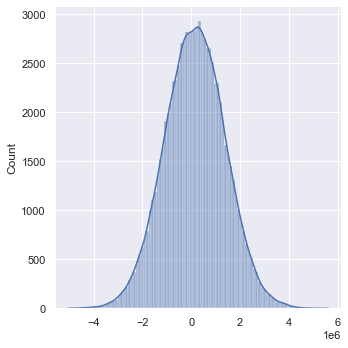

In [ ]:
sns.displot(data_normal, bins=100, kde=True)

# 4. Confidence Interval

In [ ]:
# df

In [ ]:
# tambahin kolom baru gender
df['BOROUGH'] = df['BOROUGH'].replace({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Islands'})

### a. Proportion

In [ ]:
pd.crosstab(df['BOROUGH'], df['TAX CLASS AT TIME OF SALE'])

TAX CLASS AT TIME OF SALE,1,2,3,4
BOROUGH,,,,
Bronx,4404,2114,2,529
Brooklyn,12665,9120,0,2262
Manhattan,355,16581,2,1368
Queens,16541,8431,0,1764
Staten Islands,7568,480,0,362


In [ ]:
tax4_bronx = 529
tax4_brooklyn = 2262
tax4_manhattan = 1368
tax4_queens = 1764
tax4_staten = 362
total_tax4 = tax4_bronx + tax4_brooklyn + tax4_manhattan + tax4_queens + tax4_staten
be = tax4_bronx / total_tax4

z = 1.96 # 95%

p = be
jumlah_data = total_tax4
se = np.sqrt(p * (1-p) / jumlah_data )

me = z * se

ci_low = be - me
ci_high = be + me

print(ci_low, ci_high)

0.07730451166883093 0.09103279938924386


In [ ]:
sm.stats.proportion_confint(jumlah_data * p, jumlah_data)

(0.07730463779908514, 0.09103267325898964)

### b. Mean

In [ ]:
df.groupby('BOROUGH').agg({'SALE PRICE': [np.mean, np.std, np.size]})

SALE PRICE                     
                         mean           std   size
BOROUGH                                           
Bronx            80703.655868  3.227487e+05   7049
Brooklyn        128247.795808  4.820025e+05  24047
Manhattan       334582.909406  2.412566e+06  18306
Queens           74119.434570  3.236546e+05  26736
Staten Islands   54428.653615  1.903075e+05   8410

In [ ]:
be_bronx = 80703.655868
be_brooklyn = 128247.795808
be_manhattan = 334582.909406
be_queens = 74119.434570
be_staten = 54428.653615

z = 1.96 # 95%

# bronx
se_bronx = 3.227487e+05 / np.sqrt(7049)
me_bronx = z * se_bronx
# brooklyn
se_brooklyn = 4.820025e+05 / np.sqrt(24047)
me_brooklyn = z * se_brooklyn
# manhattan
se_manhattan = 2.412566e+06 / np.sqrt(18306)
me_manhattan = z * se_manhattan
# queens
se_queens = 3.236546e+05 / np.sqrt(26736)
me_queens = z * se_queens
# staten islands
se_staten = 1.903075e+05 / np.sqrt(8410)
me_staten = z * se_staten

# bronx
ci_high_bronx = be_bronx + me_bronx
ci_low_bronx = be_bronx - me_bronx
# brooklyn
ci_high_brooklyn = be_brooklyn + me_brooklyn
ci_low_brooklyn = be_brooklyn - me_brooklyn
# manhattan
ci_high_manhattan = be_manhattan + me_manhattan
ci_low_manhattan = be_manhattan - me_manhattan
# queens
ci_high_queens = be_queens + me_queens
ci_low_queens = be_queens - me_queens
# staten islands
ci_high_staten = be_staten + me_staten
ci_low_staten = be_staten - me_staten

# bronx
print("Bronx", ci_low_bronx, ci_high_bronx)
# brooklyn
print("Brooklyn", ci_low_bronx, ci_high_bronx)
# manhattan
print("Manhattan", ci_low_bronx, ci_high_bronx)
# queens
print("Queens", ci_low_bronx, ci_high_bronx)
# staten islands
print("Staten Islands", ci_low_bronx, ci_high_bronx)

Bronx 73169.1145689363 88238.1971670637
Brooklyn 73169.1145689363 88238.1971670637
Manhattan 73169.1145689363 88238.1971670637
Queens 73169.1145689363 88238.1971670637
Staten Islands 73169.1145689363 88238.1971670637


# 5. Hypothesis Testing

In [ ]:
# data nya di download di https://www.kaggle.com/new-york-city/nyc-property-sales
df = pd.read_csv("dataset/nyc-rolling-sales.csv")

In [ ]:
n = len(df) 
borough_manhattan = len(df[df['BOROUGH'] == 3]) 
p_manhattan = borough_manhattan / n

print(p_manhattan)

0.28441831858825756


In [ ]:
be = p_manhattan
he = 0.20

se = np.sqrt(he * (1-he) / n)

test_stat = (be - he) / se
print(test_stat)

61.366079142502926


In [ ]:
pvalue = 2 * dist.norm.cdf(-np.abs(test_stat))
print(pvalue)

0.0


In [ ]:
alpha = 0.05 # 95%

if (pvalue < alpha):
    print("Reject null hypothesis")
else:
    print("Cannot reject null hypothesis")


Reject null hypothesis
